## Mini Project: Data Visualization With Pandas, Seaborn, And Matplotlib

We will use the “Palmer Penguins” dataset, a popular dataset for data exploration and visualization. It contains various measurements for three species of penguins from Palmer Station, Antarctica.

In [190]:
# import all nesessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [191]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [192]:
# Data Cleaning and Exploratory Analysis
df.shape

(344, 8)

In [193]:
# Check missing values and columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [194]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In our dataset there are 11 missing values ​​in the "gender" column. Let's first remove the rows with these missing values ​​to make sure that the rest are missing in the same rows

In [195]:
df.dropna(subset=['sex'], inplace=True)
df = df.reset_index(drop=True)

In [196]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

There is no missing values in the data set anymore

In [197]:
# Check duplicates
df.loc[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


There is no duplicates in the data set

## Exploratory Data Analysis (EDA):

In [198]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [199]:
# Check unique values in string columns
df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [200]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Visualization Tasks:

### Species Distribution: Use a bar chart to show the distribution of penguin species.

In [201]:
species_df = df.groupby('species', as_index=False).count()
species_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,146,146,146,146,146,146,146
1,Chinstrap,68,68,68,68,68,68,68
2,Gentoo,119,119,119,119,119,119,119


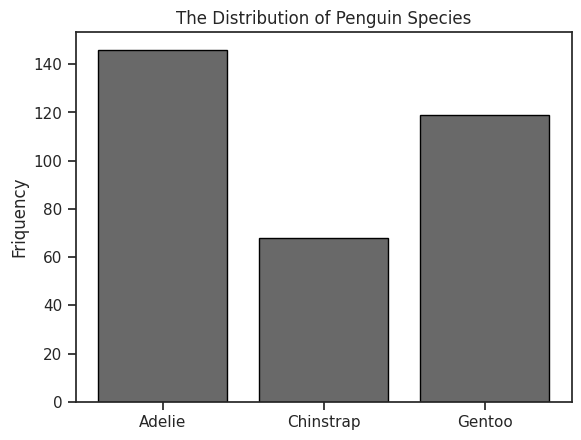

In [202]:

plt.bar(species_df.species, species_df.island, color= 'dimgray', edgecolor='black')
plt.title('The Distribution of Penguin Species')
plt.ylabel('Friquency')
plt.show()



---

The most popular species of penguins from Palmer Station is Adelie.

### Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

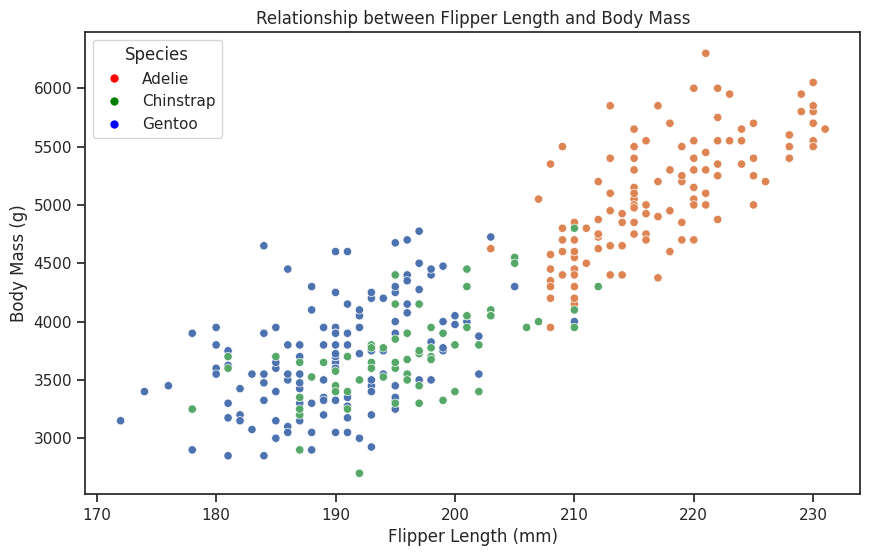

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', palette="deep")

plt.title('Relationship between Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Add a legend
#legend_labels = list(colors.keys())
handles = [plt.Line2D([0], [0], marker='o', color ='w',
                      markerfacecolor=colors[label], label=label,
                      markersize=7) for label in legend_labels]
plt.legend(handles=handles, title='Species')

# Show the plot
plt.show()




---

Looking at the scatterplot, we can conclude that Chinstrap and Gentoo have approximately the same flipper size and weight, while Adelie stands out strongly in size and weight.

### Island Distribution: Visualize the count of penguins on each island using a pie chart.

In [204]:
island_df = df.groupby('island', as_index=False).count()
island_df

,island,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Biscoe,163,163,163,163,163,163,163
1,Dream,123,123,123,123,123,123,123
2,Torgersen,47,47,47,47,47,47,47


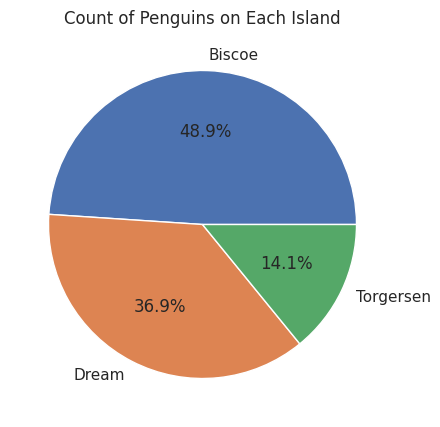

In [205]:
islands = [i for i in island_df.island]
plt.figure(figsize=(5, 5))
plt.pie(island_df.species, labels=islands,autopct ='%1.1f%%')
plt.title('Count of Penguins on Each Island')
plt.show()



---
The most penguins are on the island of Biscoe.


### Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.

In [206]:
male = df.query('sex == "male"').groupby('species', as_index=False).agg({'island':'count'})
female = df.query('sex == "female"').groupby('species', as_index=False).agg({'island':'count'})

new_df = male.merge(female, on = 'species')
new_df.rename(columns = {'island_x':'male', 'island_y':'female'}, inplace = True)
new_df

,species,male,female
0,Adelie,73,73
1,Chinstrap,34,34
2,Gentoo,61,58


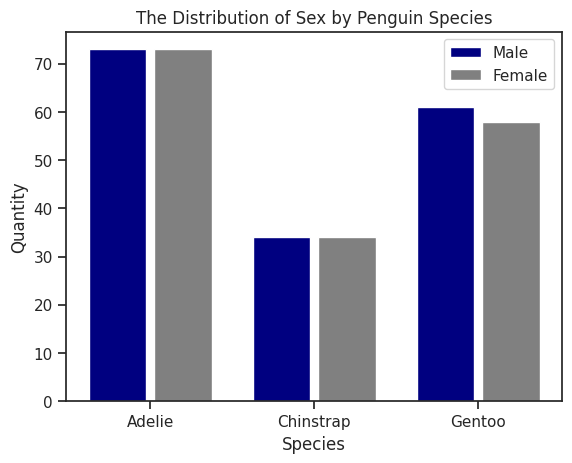

In [207]:
x = np.arange(3)
y1 = new_df.male
y2 = new_df.female
width = 0.35

plt.bar(x-0.2, y1, width, color='navy')
plt.bar(x+0.2, y2, width, color='gray')
plt.xticks(x,['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Species")
plt.ylabel("Quantity")
plt.title('The Distribution of Sex by Penguin Species')
plt.legend(["Male", "Female"])
plt.show()




---
Sample sizes of both genders are consistent across all penguin species


### Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.

In [208]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


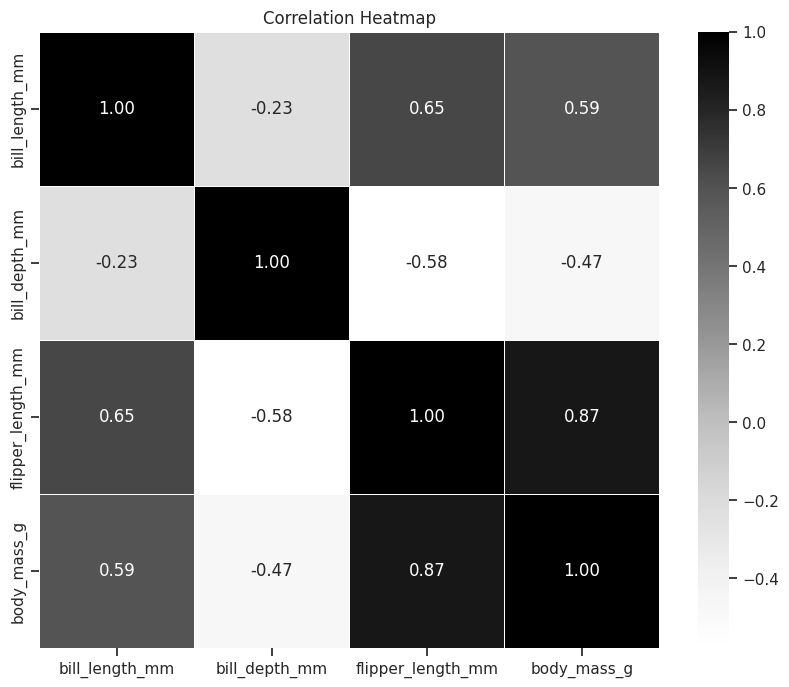

In [209]:
correlation_matrix = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()



---
One can notice that the greatest correlation is between flipper length and body weight, and a negative one between bill depth and flipper length.


### Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

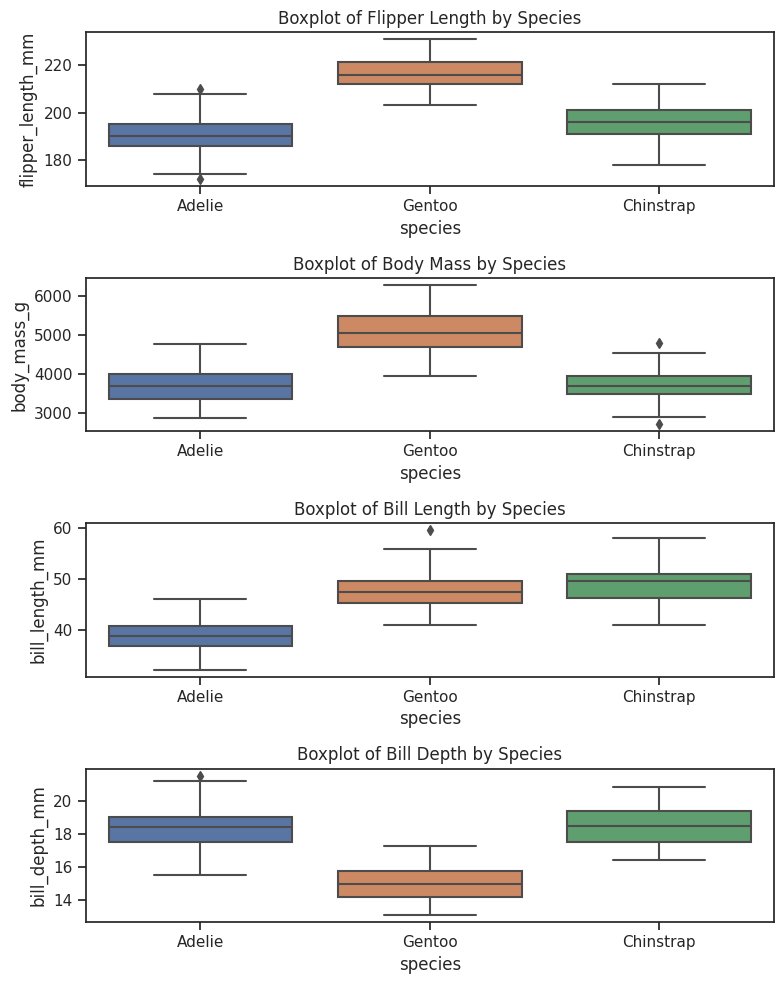

In [210]:
plt.figure(figsize=(8, 10))

# Boxplot for Flipper Length
plt.subplot(4, 1, 1)
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Boxplot of Flipper Length by Species')

# Boxplot for Body Mass
plt.subplot(4, 1, 2)
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Boxplot of Body Mass by Species')

# Boxplot for Bill Length
plt.subplot(4, 1, 3)
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Boxplot of Bill Length by Species')

# Boxplot for Bill Depth
plt.subplot(4, 1, 4)
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Boxplot of Bill Depth by Species')

plt.tight_layout()

plt.show()


In [211]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length)

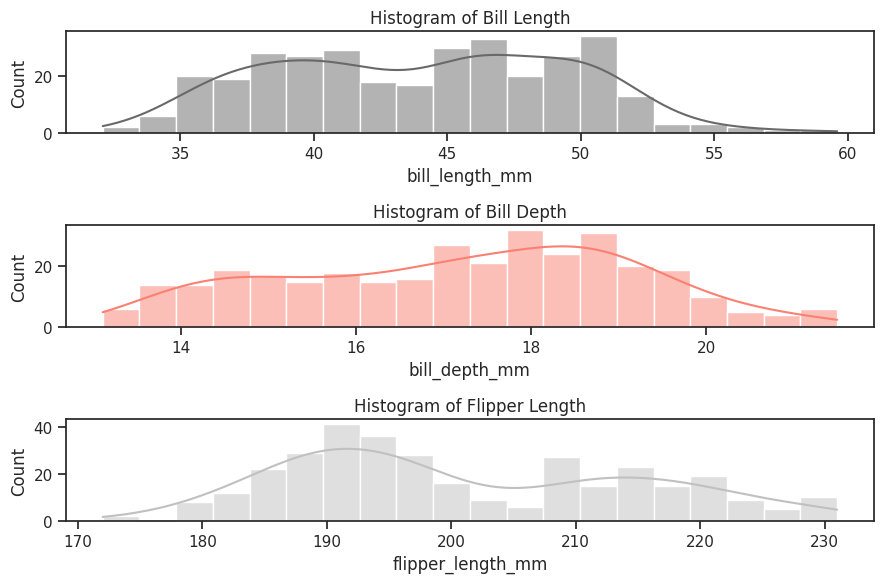

In [212]:
plt.figure(figsize=(9, 6))

# Histogram for Bill Length
plt.subplot(3, 1, 1)
sns.histplot(df['bill_length_mm'], kde=True, bins=20, color='dimgray')
plt.title('Histogram of Bill Length')

# Histogram for Bill Depth
plt.subplot(3, 1, 2)
sns.histplot(df['bill_depth_mm'], kde=True, bins=20, color='salmon')
plt.title('Histogram of Bill Depth')

# Histogram for Flipper Length
plt.subplot(3, 1, 3)
sns.histplot(df['flipper_length_mm'], kde=True, bins=20, color='silver')
plt.title('Histogram of Flipper Length')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Insightful Visualizations:

### Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.

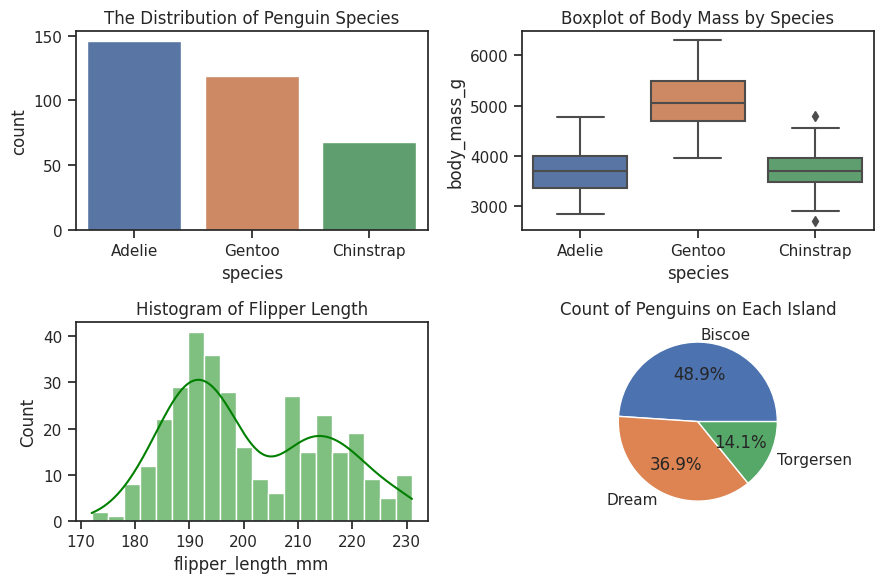

In [213]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))

# Plot 1: Countplot of Flipper Length by Species
sns.countplot(x='species', data=df, ax=axes[0, 0])
axes[0, 0].set_title('The Distribution of Penguin Species')

# Plot 2: Boxplot of Body Mass by Species
sns.boxplot(x='species', y='body_mass_g', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Body Mass by Species')

# Plot 3: Histogram of Bill Length
sns.histplot(df['flipper_length_mm'], kde=True, bins=20, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Flipper Length')

# Plot 4: Pie Chart of Number of Penguins
plt.pie(island_df.species, labels=islands,autopct ='%1.1f%%')
#sns.histplot(df['bill_depth_mm'], kde=True, bins=20, color='salmon', ax=axes[1, 1])
axes[1, 1].set_title('Count of Penguins on Each Island')

plt.tight_layout()
plt.show()


### Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.

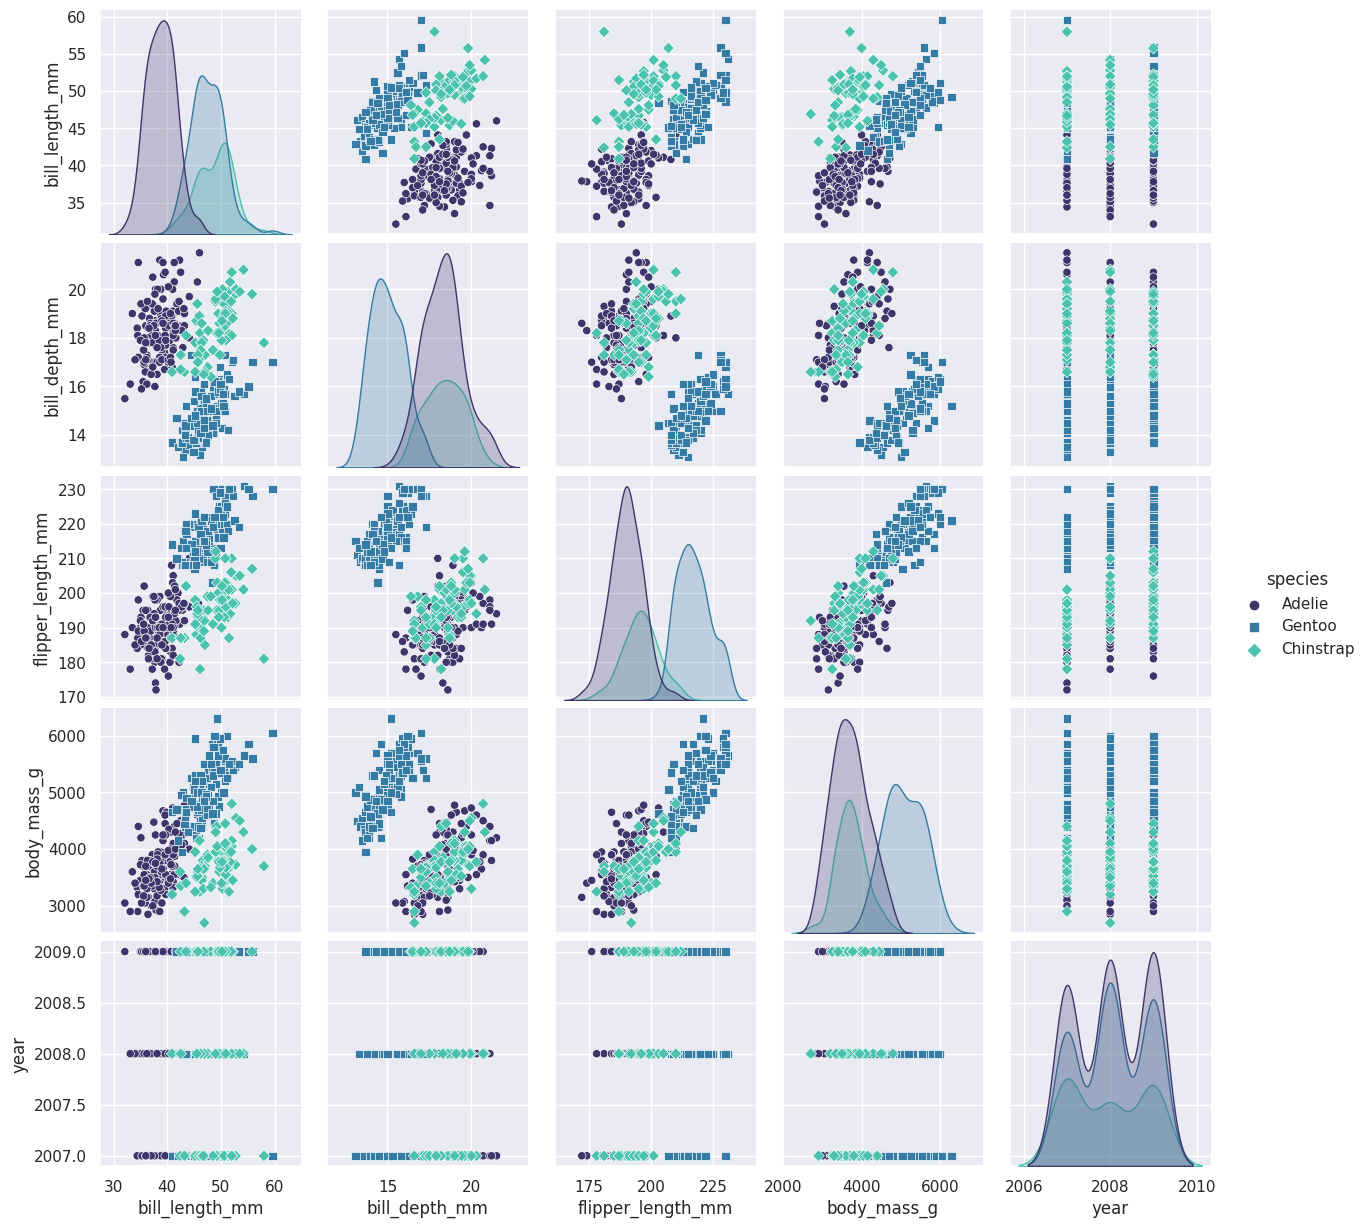

In [216]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(df, hue='species', palette='mako', markers=["o", "s", "D"])

# Show the plot
plt.show()
